#Introdução


Com o objetivo de aprender sobre o framework Agno, este notebook realiza uma análise automatizada da cotação do dólar em relação ao real utilizando Python e inteligência artificial.

Ele combina três elementos principais:

Coleta de dados: obtém os últimos 30 dias de cotações do dólar em reais (abertura, fechamento, máxima e mínima) usando yfinance.

Análise com IA: utiliza o modelo Groq (llama-3.3-70b-versatile) para identificar padrões e tendências de curto prazo a partir dos últimos cinco registros.


#Dados - análise visual


/tmp/ipython-input-1363846491.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(ticker, period="1mo", interval="1d")# period="1mo" indica que o período dos dados é de 1 mês
[*********************100%***********************]  1 of 1 completed


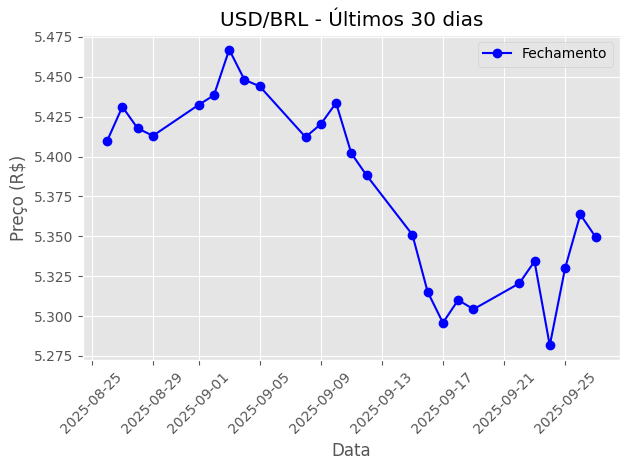

In [26]:
# data: 27/09/25
# Os próximos códigos geram o gráfico dos dados coletados
# assim podemos visualizar facilmente a evolução dos preços do dólar
# nos últimos 50 dias e identificar tendências de alta, baixa ou instabilidade


import yfinance as yf
import matplotlib.pyplot as plt

# --- Baixar dados do dólar ---
ticker = "USDBRL=X"
dados = yf.download(ticker, period="1mo", interval="1d")# period="1mo" indica que o período dos dados é de 1 mês

# --- Selecionar últimos 50 registros ---
ultimos = dados

# --- Gerar gráfico ---
plt.style.use('ggplot')
plt.plot(ultimos.index, ultimos['Close'], label='Fechamento', color='blue', marker='o')
plt.title('USD/BRL - Últimos 30 dias')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Série temporal - breve explicação


Uma série temporal é um conjunto de observações registradas sequencialmente ao longo do tempo. Matematicamente, podemos denotar por $\{Y_{t} : t \in T\}$.

Dados com essas características, podem ser analisados tomando:

$$Y_{t} = T_{t} + S_{t} + e_{t} $$

em que:

$$\begin{aligned}
Y_t &\text{ é o valor observado no tempo } t,\\
T_t &\text{ é a tendência no tempo } t,\\
S_t &\text{ é a sazonalidade no tempo } t,\\
e_t &\text{ é o componente aleatório} t.
\end{aligned}$$


Essa decomposição ajuda a entender o comportamento dos dados - ferramentas como Scikit-learn, Caret, Keras usam esses conceitos para treinar algoritmos de aprendizado de máquina, permitindo fazer previsões e afins.

Com isso em mente, o próximo bloco executa o seguinte teste: ver se o modelo consegue analisar os dados de entrada e gerar scripts R com possíveis análises


#AgenteIA

In [19]:
# -*- coding: utf-8 -*-
"""
Análise do Dólar (USD/BRL) no Jupyter Notebook com Markdown formatado
"""

import yfinance as yf
from agno.agent import Agent
from agno.models.groq import Groq
from IPython.display import Markdown, display

# --- 1. Baixar dados do dólar ---
ticker = "USDBRL=X"  # Dólar em Reais
dados = yf.download(ticker, period="1mo", interval="1d")

# --- 2. Selecionar os últimos 50 registros ---
ultimos = dados.tail(50)
resumo = ultimos.to_string()

# --- 3. Criar o agente Groq ---
agent = Agent(
    model=Groq(
        id="llama-3.3-70b-versatile",
        max_tokens=1024,
        api_key="API_KEY"
    ),
    markdown=True
)

# --- 4. Prompt para o modelo ---
prompt = f"""
Analise os últimos preços do dólar em relação ao real (USD/BRL):

{resumo}

Quais padrões você observa e qual possível tendência de curto prazo?
Você consegue gerar uma breve explicação sobre esses padrões?Justifique utilizando a linguagem R.
"""

# --- 5. Rodar modelo ---
resposta = agent.run(prompt).content

# --- 6. Montar saída em Markdown ---
tabela = ultimos[["Open", "High", "Low", "Close"]].round(2).to_markdown()

texto = f"""
# 💵 Análise do Dólar (USD/BRL)

## 📊 Últimos 50 dias
{tabela}

---

## 🔎 Observações do Modelo
{resposta}

---

✅ *Análise gerada automaticamente pelo modelo Groq*
"""

display(Markdown(texto))


/tmp/ipython-input-2164134394.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(ticker, period="1mo", interval="1d")
[*********************100%***********************]  1 of 1 completed



# 💵 Análise do Dólar (USD/BRL)

## 📊 Últimos 50 dias
| Date                |   ('Open', 'USDBRL=X') |   ('High', 'USDBRL=X') |   ('Low', 'USDBRL=X') |   ('Close', 'USDBRL=X') |
|:--------------------|-----------------------:|-----------------------:|----------------------:|------------------------:|
| 2025-08-26 00:00:00 |                   5.41 |                   5.43 |                  5.4  |                    5.41 |
| 2025-08-27 00:00:00 |                   5.43 |                   5.46 |                  5.42 |                    5.43 |
| 2025-08-28 00:00:00 |                   5.42 |                   5.44 |                  5.4  |                    5.42 |
| 2025-08-29 00:00:00 |                   5.41 |                   5.44 |                  5.41 |                    5.41 |
| 2025-09-01 00:00:00 |                   5.43 |                   5.45 |                  5.41 |                    5.43 |
| 2025-09-02 00:00:00 |                   5.44 |                   5.5  |                  5.43 |                    5.44 |
| 2025-09-03 00:00:00 |                   5.47 |                   5.5  |                  5.43 |                    5.47 |
| 2025-09-04 00:00:00 |                   5.45 |                   5.47 |                  5.44 |                    5.45 |
| 2025-09-05 00:00:00 |                   5.44 |                   5.45 |                  5.38 |                    5.44 |
| 2025-09-08 00:00:00 |                   5.41 |                   5.45 |                  5.4  |                    5.41 |
| 2025-09-09 00:00:00 |                   5.42 |                   5.44 |                  5.41 |                    5.42 |
| 2025-09-10 00:00:00 |                   5.43 |                   5.44 |                  5.4  |                    5.43 |
| 2025-09-11 00:00:00 |                   5.4  |                   5.42 |                  5.37 |                    5.4  |
| 2025-09-12 00:00:00 |                   5.39 |                   5.4  |                  5.35 |                    5.39 |
| 2025-09-15 00:00:00 |                   5.35 |                   5.36 |                  5.31 |                    5.35 |
| 2025-09-16 00:00:00 |                   5.32 |                   5.32 |                  5.3  |                    5.32 |
| 2025-09-17 00:00:00 |                   5.3  |                   5.31 |                  5.29 |                    5.3  |
| 2025-09-18 00:00:00 |                   5.31 |                   5.35 |                  5.27 |                    5.31 |
| 2025-09-19 00:00:00 |                   5.3  |                   5.34 |                  5.3  |                    5.3  |
| 2025-09-22 00:00:00 |                   5.32 |                   5.36 |                  5.32 |                    5.32 |
| 2025-09-23 00:00:00 |                   5.33 |                   5.34 |                  5.28 |                    5.33 |
| 2025-09-24 00:00:00 |                   5.28 |                   5.32 |                  5.27 |                    5.28 |
| 2025-09-25 00:00:00 |                   5.33 |                   5.35 |                  5.31 |                    5.33 |
| 2025-09-26 00:00:00 |                   5.36 |                   5.37 |                  5.33 |                    5.36 |
| 2025-09-27 00:00:00 |                   5.35 |                   5.35 |                  5.35 |                    5.35 |

---

## 🔎 Observações do Modelo
### Análise dos Preços do Dólar em Relação ao Real (USD/BRL)

#### Observação dos Padrões

Ao analisar os preços do dólar em relação ao real (USD/BRL) nos últimos dias, é possível observar alguns padrões:

*   **Flutuação**: Os preços apresentam flutuação, mas sem uma tendência clara de alta ou baixa.
*   **Resistência**: O preço de 5,45 parece ser um nível de resistência, pois o preço tentou ultrapassar esse nível em várias ocasiões, mas não conseguiu.
*   **Suporte**: O preço de 5,30 parece ser um nível de suporte, pois o preço tentou cair abaixo desse nível, mas não conseguiu.

#### Tendência de Curto Prazo

É difícil determinar uma tendência de curto prazo com base nos dados disponíveis, pois os preços apresentam flutuação e não há uma direção clara. No entanto, se considerarmos a média móvel simples (MMS) de 5 dias, podemos observar que a tendência é ligeiramente ascendente.

#### Código em R

Aqui está um exemplo de código em R que pode ser usado para analisar os preços do dólar em relação ao real (USD/BRL):

```r
# Carregar as bibliotecas necessárias
library(readr)
library(ggplot2)
library(dplyr)

# Carregar os dados
dados <- read_csv("dados.csv")

# Converter a data para o formato Date
dados$Date <- as.Date(dados$Date)

# Calcular a média móvel simples (MMS) de 5 dias
dados$MMS_5 <- rollmean(dados$Close, k = 5, fill = NA, align = "right")

# Plotar os preços e a MMS
ggplot(dados, aes(x = Date, y = Close)) + 
  geom_line() + 
  geom_line(aes(y = MMS_5), color = "red") + 
  theme_classic() + 
  labs(title = "Preços do Dólar em Relação ao Real (USD/BRL)", x = "Data", y = "Preço")

# Calcular a tendência de curto prazo
tendencia_curto_prazo <- dados %>% 
  filter(!is.na(MMS_5)) %>% 
  summarise(tendencia = mean(Close - MMS_5))

# Imprimir a tendência de curto prazo
print(tendencia_curto_prazo)
```

Esse código carrega as bibliotecas necessárias, carrega os dados, converte a data para o formato Date, calcula a média móvel simples (MMS) de 5 dias, plota os preços e a MMS, calcula a tendência de curto prazo e imprime a tendência.

Observe que o código supõe que os dados estejam armazenados em um arquivo CSV chamado "dados.csv" e que as colunas sejam nomeadas como no exemplo. Além disso, o código usa a média móvel simples (MMS) para calcular a tendência de curto prazo, mas existem outras formas de calcular a tendência, como a média móvel exponencial (MME) ou a análise de regressão.

---

✅ *Análise gerada automaticamente pelo modelo Groq*


# Referências

**Chris Chatfield & Haipeng Xing (2019). _The Analysis of Time Series: An Introduction with R_ (7th Edition). CRC Press.**

**Documentação AGNO:** [https://docs.agno.com/](https://docs.agno.com/)
